1ère patie:La phase de préparation de données



In [ ]:
#Télécharger et lire la base de données cancer_des_poumons.csv existent dans votre
import pandas as pd # Importer la librairie pandas sous l'alias pd
data = pd.read_csv('/content/drive/MyDrive/cancer_des_poumons.csv')# Lire le fichier CSV et charger les données dans un DataFrame nommé data
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,M,69,NaN,2,2,1,1.0,2,1,2,2,2,2,2,2
1,M,74,2.0,1,1,1,2.0,2,2,1,1,1,2,2,2
2,F,59,1.0,1,1,2,1.0,2,1,2,1,2,2,1,2
3,M,63,2.0,2,2,1,1.0,1,1,1,2,1,1,2,2
4,F,63,NaN,2,1,1,1.0,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1.0,1,1,2,2.0,2,1,1,2,2,2,2,1
305,M,70,2.0,1,1,1,1.0,2,2,2,2,2,2,1,2
306,M,58,2.0,1,1,1,1.0,1,2,2,2,2,1,1,2
307,M,67,2.0,1,2,1,1.0,2,2,1,2,2,2,1,2


In [ ]:
#indiquer le nombre des observations dans la base ainsi que le nombre des caractéristiques.
nb_observations=data.shape[0]# Calculer le nombre d'observations en comptant le nombre de lignes dans le DataFrame data
nb_caracteristiques=data.shape[1]# Calculer le nombre de caractéristiques en comptant le nombre de colonnes dans le DataFrame data
print(f"nb d'observations:{nb_observations}")
print(f"nb de caractéristiques:{nb_caracteristiques}")

nb d'observations:309
nb de caractéristiques:15


In [ ]:
#Appliquer le codage nécessaire pour transformer les caractéristiques dont les valeurs sont de type chaine de caractères en entier.
data['GENDER'] = data['GENDER'].replace({'F': 0, 'M': 1})## Remplacer les valeurs 'F' (féminin) par 0 et 'M' (masculin) par 1 dans la colonne 'GENDER'
data #afficher la dataframe après tranformation





,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,NaN,2,2,1,1.0,2,1,2,2,2,2,2,2
1,1,74,2.0,1,1,1,2.0,2,2,1,1,1,2,2,2
2,0,59,1.0,1,1,2,1.0,2,1,2,1,2,2,1,2
3,1,63,2.0,2,2,1,1.0,1,1,1,2,1,1,2,2
4,0,63,NaN,2,1,1,1.0,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1.0,1,1,2,2.0,2,1,1,2,2,2,2,1
305,1,70,2.0,1,1,1,1.0,2,2,2,2,2,2,1,2
306,1,58,2.0,1,1,1,1.0,1,2,2,2,2,1,1,2
307,1,67,2.0,1,2,1,1.0,2,2,1,2,2,2,1,2


In [ ]:
#Vérifier s’il existe des observations qui sont manquantes ou NaN, si c’est le cas alors remplacer les valeurs manquantes dans chaque colonne par la moyenne de la variable.
if data.isnull().values.any(): # Vérifier s'il existe des valeurs manquantes (NaN) dans le DataFrame
   data = data.fillna(data.mean()) # Remplacer les valeurs manquantes par la moyenne de chaque colonne
   print("les valeurs manquantes ont été remplacées")
else:
   print("pas de valeurs manquantes ")





les valeurs manquantes ont été remplacées


In [ ]:
#Vérifier si la base est normalisée ou non (centrée réduite)
import pandas as pd
from sklearn.preprocessing import StandardScaler # Importer la classe StandardScaler du module preprocessing de scikit-learn
# Calculer la moyenne et l'écart type de chaque colonne
means=data.mean()
stds=data.std()
is_normalized = all(means.abs() < 1e-10) and all((stds - 1).abs() < 1e-10)# Vérifier si la base est normalisée en vérifiant si la moyenne est proche de 0 et l'écart type est proche de 1
if not is_normalized:
    scaler = StandardScaler()# Créer un objet StandardScaler pour normaliser les données
    data_normalized = scaler.fit_transform(data)#Appliquer la normalisation aux données
    data_normalized = pd.DataFrame(data_normalized, columns=data.columns)#Créer un nouveau DataFrame avec les données normalisées
    print(data_normalized)
    print("Les données ont été normalisées.")

else:
    print("Les données sont déjà normalisées.")

       GENDER       AGE   SMOKING  YELLOW_FINGERS   ANXIETY  PEER_PRESSURE  \
0    0.952579  0.771850  0.000000        0.869300  1.003241      -1.003241   
1    0.952579  1.381829  0.877125       -1.150351 -0.996769      -1.003241   
2   -1.049781 -0.448107 -1.147516       -1.150351 -0.996769       0.996769   
3    0.952579  0.039876  0.877125        0.869300  1.003241      -1.003241   
4   -1.049781  0.039876  0.000000        0.869300 -0.996769      -1.003241   
..        ...       ...       ...             ...       ...            ...   
304 -1.049781 -0.814095 -1.147516       -1.150351 -0.996769       0.996769   
305  0.952579  0.893846  0.877125       -1.150351 -0.996769      -1.003241   
306  0.952579 -0.570103  0.877125       -1.150351 -0.996769      -1.003241   
307  0.952579  0.527859  0.877125       -1.150351  1.003241      -1.003241   
308  0.952579 -0.082120 -1.147516       -1.150351 -0.996769       0.996769   

     CHRONIC DISEASE   FATIGUE   ALLERGY  WHEEZING  ALCOHOL CON

                         GENDER       AGE   SMOKING  YELLOW_FINGERS   ANXIETY  \
GENDER                 1.000000  0.021306  0.036069       -0.212959 -0.152127   
AGE                    0.021306  1.000000 -0.081817        0.005205  0.053170   
SMOKING                0.036069 -0.081817  1.000000       -0.008190  0.160968   
YELLOW_FINGERS        -0.212959  0.005205 -0.008190        1.000000  0.565829   
ANXIETY               -0.152127  0.053170  0.160968        0.565829  1.000000   
PEER_PRESSURE         -0.275564  0.018685 -0.050455        0.323083  0.216841   
CHRONIC DISEASE       -0.208392 -0.017340 -0.146988        0.044045 -0.006399   
FATIGUE               -0.083560  0.012614 -0.032442       -0.118058 -0.188538   
ALLERGY                0.154251  0.027990 -0.006401       -0.144300 -0.165750   
WHEEZING               0.141207  0.055011 -0.123344       -0.078515 -0.191807   
ALCOHOL CONSUMING      0.454268  0.058985 -0.051683       -0.289025 -0.165750   
COUGHING               0.133

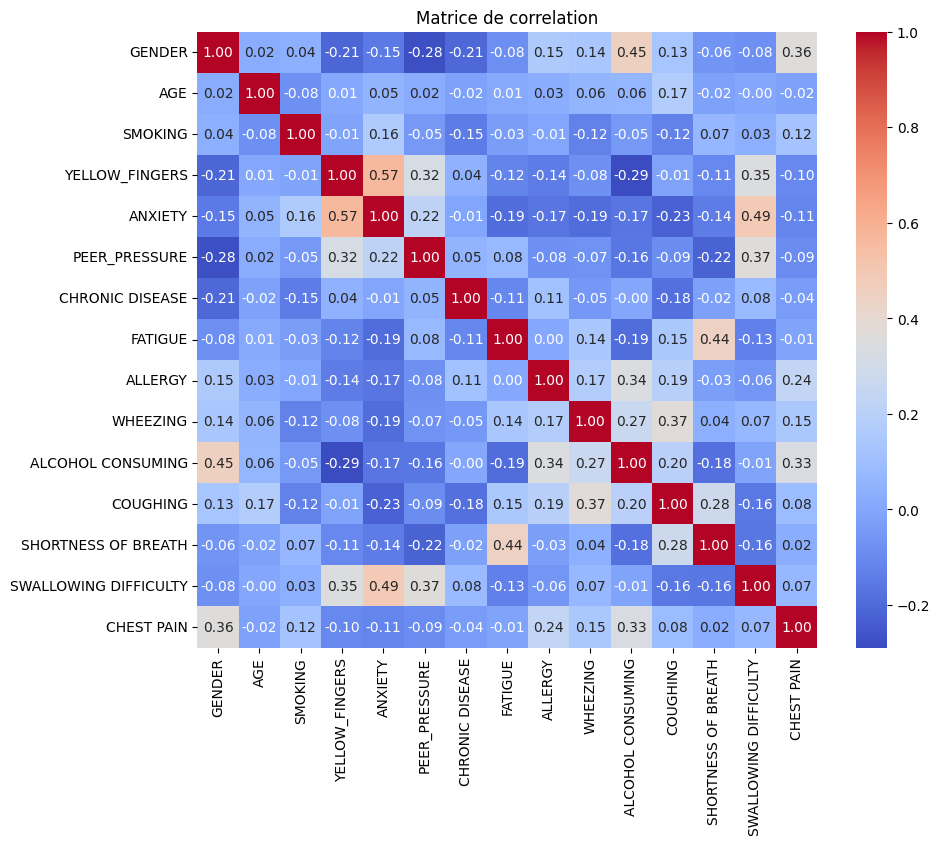

YELLOW_FINGERS         ANXIETY                  0.565829
ANXIETY                YELLOW_FINGERS           0.565829
SWALLOWING DIFFICULTY  ANXIETY                  0.489403
ANXIETY                SWALLOWING DIFFICULTY    0.489403
ALCOHOL CONSUMING      GENDER                   0.454268
dtype: float64


In [ ]:
# la matrice de corrélation
correlation_matrix=data.corr()#Calculer la matrice de corrélation entre les variables
print(correlation_matrix)#Afficher la matrice de corrélation
# Tracer un heatmap de la matrice de corrélation pour visualiser les dépendances entre les variables
import seaborn as sns # cette bibliothèque pour créer un heatmap
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8)) #Créer une figure de taille 10x8 pouces
# Utiliser seaborn pour créer un heatmap de la matrice de corrélation
# annot=True ajoute les valeurs de corrélation dans chaque cellule du heatmap
# cmap='coolwarm' utilise une palette de couleurs allant du bleu au rouge pour représenter les valeurs de corrélation
# fmt=".2f" formate les annotations pour afficher deux chiffres après la virgule
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f")
# Ajouter un titre au heatmap
plt.title("Matrice de correlation")
# afficher heatmap
plt.show()
# Recherche des couples de variables les plus corrélées
max_corr = correlation_matrix.abs().stack().sort_values(ascending=False)
max_corr = max_corr[max_corr < 1]  # Exclure la corrélation d'une variable avec elle-même
top_corr_pairs = max_corr.head(5)  # Sélectionner les 5 premières paires les plus corrélées
print(top_corr_pairs)

2ème partie:ACP


In [ ]:
#Appliquer sur la base une ACP normée et Interpréter les valeurs propres.
#Importer la classe PCA du module decomposition de scikit-learn
from sklearn.decomposition import PCA
#Créer une instance de PCA sans spécifier le nombre de composantes
pca = PCA()
# Appliquer l'ACP sur les données normalisées et obtenir les composantes principales
pca_result = pca.fit_transform(data_normalized)
# afficher les résultats de l'ACP
print(pca_result)
# Calculer et afficher les valeurs propres
print("Valeurs propres :")
valeurs_propres=pca.explained_variance_
print(valeurs_propres)


[[-0.55493371  0.67223531 -1.7488929  ... -0.64993268  0.30434005
   0.43071819]
 [-0.69544815 -0.32061579  1.04199725 ...  1.83633382  0.54489194
   0.54599223]
 [-0.791573   -2.08783586 -0.88237083 ... -0.23989378 -0.28017981
  -1.02038651]
 ...
 [-2.61670646  1.58224216  1.10092295 ...  0.25972266  0.29101917
  -0.30621186]
 [-1.86703609  0.03733447  0.39915013 ... -0.78414149  0.51936131
  -0.89160038]
 [-0.70759825  0.98056213 -0.17005514 ...  0.68054039 -0.29111241
   0.48602686]]
Valeurs propres :
[2.87102374 1.94700442 1.54418309 1.35445336 1.1286086  0.97145805
 0.89059047 0.8176818  0.73806281 0.63445738 0.57620854 0.52468084
 0.43208774 0.33163979 0.28656066]


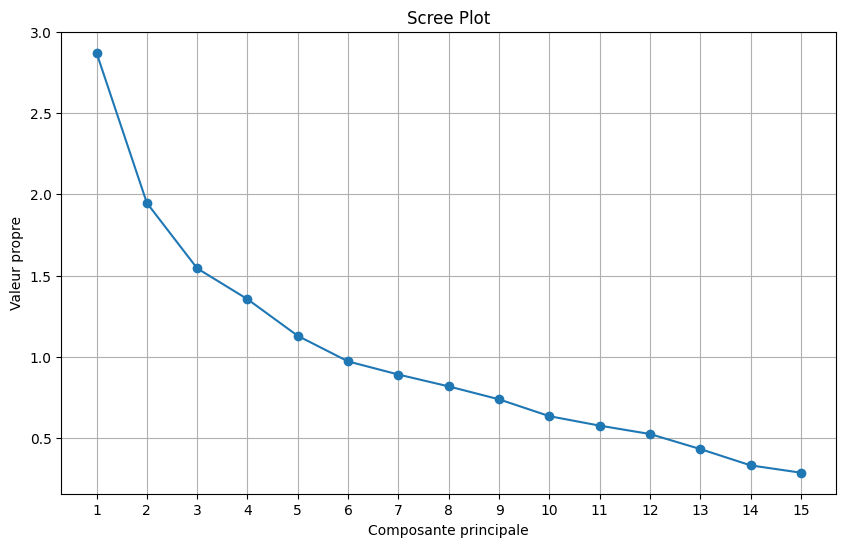

total inertie:
15.048701298701301
Composante 1: 19.08%
Composante 2: 12.94%
Composante 3: 10.26%
Composante 4: 9.00%
Composante 5: 7.50%
Composante 6: 6.46%
Composante 7: 5.92%
Composante 8: 5.43%
Composante 9: 4.90%
Composante 10: 4.22%
Composante 11: 3.83%
Composante 12: 3.49%
Composante 13: 2.87%
Composante 14: 2.20%
Composante 15: 1.90%


In [ ]:
import matplotlib.pyplot as plt #Importer la bibliothèque matplotlib pour créer des graphiques

# Tracer l’éboulis des valeurs propres
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(valeurs_propres) + 1), valeurs_propres, marker='o', linestyle='-')
plt.title('Scree Plot')  # Titre du graphique
plt.xlabel('Composante principale')# Nom de l'axe des x
plt.ylabel('Valeur propre')# Nom de l'axe des y
plt.xticks(range(1, len(valeurs_propres) + 1))# Échelle des x
plt.grid(True)# Afficher une grille
plt.show()# Afficher le graphique

# Calculez la somme totale des valeurs propres
total_inertie = sum(valeurs_propres)
print("total inertie:")
print(total_inertie)
inertie_pourcentages = [(valeur_propre / total_inertie) * 100 for valeur_propre in valeurs_propres]
# Afficher le pourcentage d'inertie pour chaque composante principale
explained_variance_ratio = pca.explained_variance_ratio_
for i, pourcentage in enumerate(inertie_pourcentages):
    print(f"Composante {i+1}: {pourcentage:.2f}%")


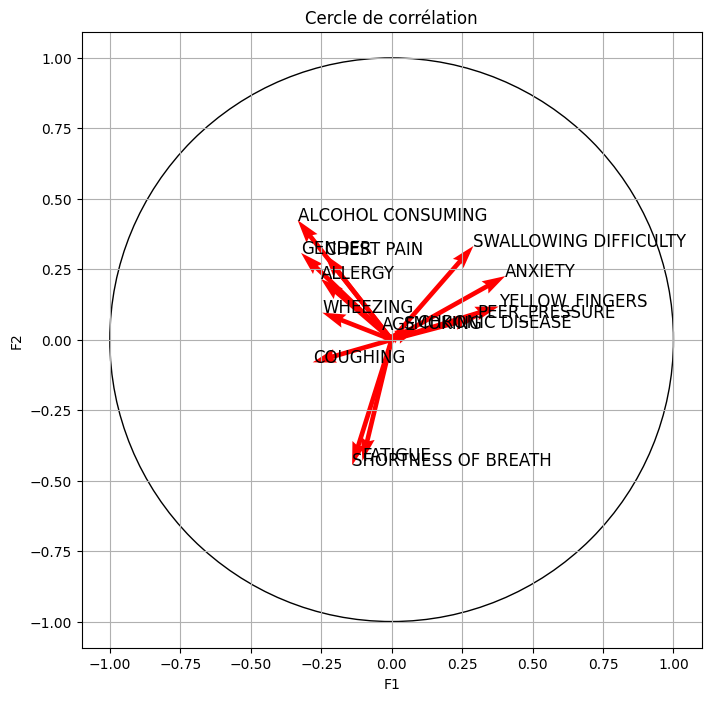

In [ ]:
#vecteur propres de matrice de corrélation
loading_matrix = pca.components_
# Tracer le cercle de corrélation
plt.figure(figsize=(8, 8))
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('F1')
plt.ylabel('F2')

# Tracer les flèches représentant les variables sur le cercle de corrélation
for idx, (a, b) in enumerate(zip(loading_matrix[0], loading_matrix[1])):
    plt.quiver(0, 0, a, b, angles='xy', scale_units='xy', scale=1, color='r')
    plt.text(a, b, data.columns[idx], fontsize=12)

# Titre et affichage du graphique
plt.title('Cercle de corrélation')

# Ajouter le cercle
circle = plt.Circle((0, 0), 1, color='black', fill=False)
plt.gca().add_patch(circle)

# Afficher le cercle de corrélation
plt.axis('equal')
plt.grid()
plt.show()


In [ ]:
#Appliquer l'algorithme des K-means pour diviser les données en deux classes
from sklearn.cluster import KMeans
# Initialiser l'algorithme K-means avec 2 clusters et fixer la random state pour la reproductibilité
kmeans = KMeans(n_clusters=2,random_state=42)
#Prédire les clusters pour chaque observation
clusters=kmeans.fit_predict(pca_result)
dis =kmeans.fit_transform(data_normalized) # distance  entre chaque echantillon et chaque cluster aprés la stabilisation
# Affichage des coordonnées de centroïde
centroids=kmeans.cluster_centers_
print("Coordonnées des centroïdes :")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i+1} : {centroid}")

Coordonnées des centroïdes :
Cluster 1 : [-0.43026642 -0.0389835   0.07808241  0.4229679   0.47285198  0.27853317
  0.14202283 -0.17477061 -0.30862496 -0.33086755 -0.43095922 -0.39003054
 -0.14947894  0.29962469 -0.31974626]
Cluster 2 : [ 0.60842361  0.05512511 -0.11041341 -0.59810305 -0.66864226 -0.39386331
 -0.20082915  0.24713657  0.43641498  0.4678674   0.60940327  0.55152756
  0.21137256 -0.42368804  0.45214119]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


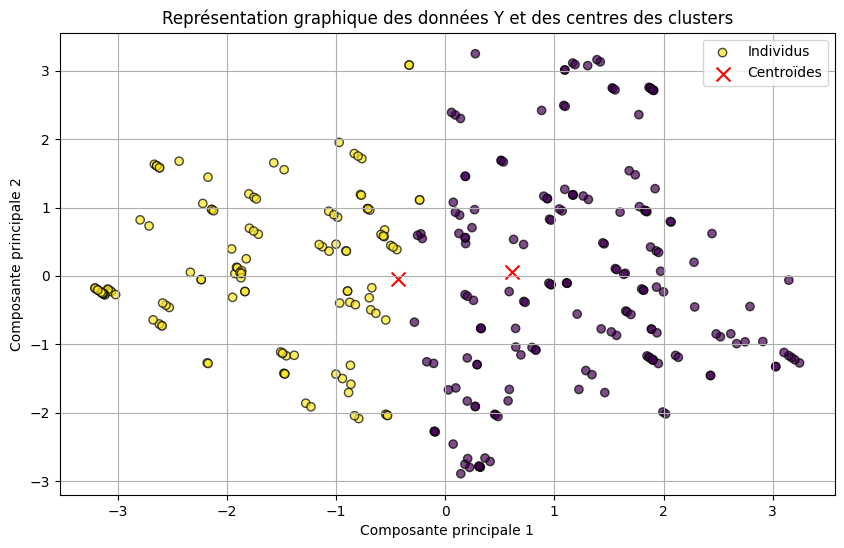

In [ ]:
import matplotlib.pyplot as plt

#Crée une nouvelle figure pour le graphique avec une taille de 10 pouces de largeur par 6 pouces de hauteur.
plt.figure(figsize=(10, 6))

#Trace un nuage de points pour les données transformées par PCA (pca_result), en utilisant la première composante principale sur l'axe x et la deuxième composante principale sur l'axe y. Les points sont colorés en fonction de leur cluster attribué (clusters), avec une colormap 'viridis'. Les bords des points sont en noir (edgecolors='k') et l'alpha est réglé à 0.7 pour la transparence. Chaque point est étiqueté comme "Individus".
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', edgecolors='k', alpha=0.7, label='Individus')

# trace les centroïdes des clusters (centroids) sur le même graphique
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label='Centroïdes')

plt.title('Représentation graphique des données Y et des centres des clusters')#e titre du graphe.
plt.xlabel('Composante principale 1')#Définit le label de l'axe x
plt.ylabel('Composante principale 2')#Définit le label de l'axe y
plt.legend()
plt.grid(True)# Affiche une grille
plt.show()# Affiche le graphe


In [ ]:
# Importe la fonction silhouette_score de scikit-learn, qui est utilisée pour calculer le score de silhouette.
from sklearn.metrics import silhouette_score
# Importe les fonctions fcluster et linkage de SciPy, nécessaires pour la CAH.
from scipy.cluster.hierarchy import fcluster,linkage
# Nombre de clusters souhaité pour la CAH
nombre_clusters_cah = 2
#Calcule la matrice de liaison d en utilisant la méthode de liaison 'ward', basée sur la distance euclidienne des données PCA.
d = linkage(pca_result, method='ward')
# Attribuer des étiquettes de cluster à partir de la matrice de liaison
labels_cah = fcluster(d, nombre_clusters_cah, criterion='maxclust')
# Calculer le score de silhouette pour la CAH
cah_silhouette = silhouette_score(pca_result, labels_cah)

# Calculer le score de silhouette pour K-means
kmeans_silhouette = silhouette_score(pca_result, kmeans.labels_)

# Affichage des scores de silhouette
print("Score de silhouette pour CAH:", cah_silhouette)
print("Score de silhouette pour K-means:", kmeans_silhouette)

# Comparaison des scores de silhouette
if cah_silhouette > kmeans_silhouette:
    print("CAH offre une meilleure séparation des clusters.")
elif kmeans_silhouette > cah_silhouette:
    print("K-means offre une meilleure séparation des clusters.")
else:
    print("les deux méthodes ont une performance similaire en termes de qualité du clustering.")

Score de silhouette pour CAH: 0.12591035161241218
Score de silhouette pour K-means: 0.13584432605907965
K-means offre une meilleure séparation des clusters.


Button(description='Import Data', style=ButtonStyle())

Button(description='Preprocess Data', style=ButtonStyle())

Button(description='Apply PCA', style=ButtonStyle())

Button(description='Apply KMeans', style=ButtonStyle())

Button(description='Display Results', style=ButtonStyle())

Data imported successfully.
Data preprocessed successfully.
PCA applied successfully.
KMeans applied successfully.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


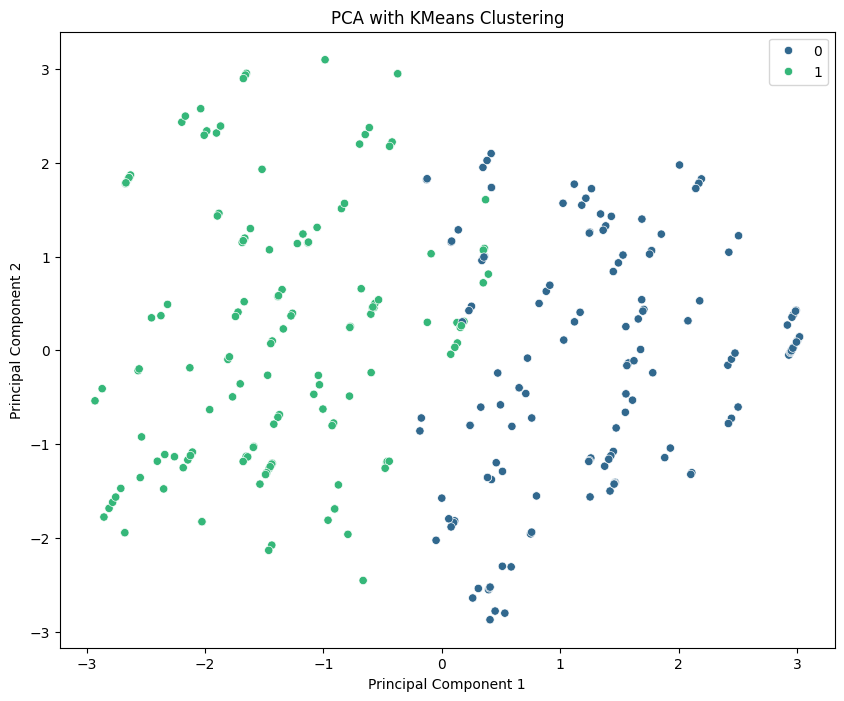

In [ ]:
import pandas as pd # Importe la bibliothèque Pandas sous l'alias pd
from sklearn.preprocessing import StandardScaler# Importe la classe StandardScaler de sklearn.preprocessing pour normaliser les données
from sklearn.decomposition import PCA # Importe la classe PCA de sklearn.decomposition pour l'analyse en composantes principales (PCA)
from sklearn.cluster import KMeans #Importe la classe KMeans de sklearn.cluster pour l'algorithme de regroupement K-means
import matplotlib.pyplot as plt#Importe la bibliothèque Matplotlib pour créer des graphiques
import seaborn as sns# Importe la bibliothèque Seaborn pour des graphiques statistiques améliorés
import ipywidgets as widgets# Importe la bibliothèque ipywidgets pour créer des éléments interactifs dans Jupyter Notebook
from IPython.display import display # Importe la fonction display de IPython pour afficher des éléments dans le notebook

data = None  # Initialise la variable data à None pour stocker les données importées
data_normalized = None  # Initialise la variable data_normalized à None pour stocker les données normalisées
pca_result = None  # Initialise la variable pca_result à None pour stocker les résultats de l'ACP
clusters = None  # Initialise la variable clusters à None pour stocker les clusters générés par K-means
#une fonction pour importer les données
def import_data(b):
    global data
    data = pd.read_csv('/content/drive/MyDrive/cancer_des_poumons.csv')
    print("Data imported successfully.")
#une fonction pour prétraiter les données
def preprocess_data(b):
    global data_normalized
    if data is not None:
        # Exclure les colonnes non numériques
        non_numeric_columns = data.select_dtypes(exclude=['number']).columns
        numeric_data = data.drop(non_numeric_columns, axis=1)
         # Normalise les données
        scaler = StandardScaler()
        data_normalized = scaler.fit_transform(numeric_data)
        print("Data preprocessed successfully.")
#une fonction pour appliquer l'ACP
def apply_pca(b):
    global pca_result
    if data_normalized is not None:
        # Remplacer les valeurs manquantes par la moyenne de la colonne
        data_no_nan = pd.DataFrame(data_normalized).fillna(pd.DataFrame(data_normalized).mean())
         # Applique l'ACP
        pca = PCA()
        pca_result = pca.fit_transform(data_no_nan)
        print("PCA applied successfully.")
#une fonction pour appliquer K-means
def apply_kmeans(b):
    global clusters
    if pca_result is not None:
        # Applique K-means pour générer les clusters
        kmeans = KMeans(n_clusters=2, random_state=42)
        clusters = kmeans.fit_predict(pca_result)
        print("KMeans applied successfully.")
#une fonction pour afficher les résultats
def display_results(b):
    if clusters is not None:
        plt.figure(figsize=(10, 8))
        sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=clusters, palette="viridis")
        plt.title("PCA with KMeans Clustering")
        plt.xlabel("Principal Component 1")
        plt.ylabel("Principal Component 2")
        plt.show()

# Créer des boutons
btn_import = widgets.Button(description='Import Data')
btn_preprocess = widgets.Button(description='Preprocess Data')
btn_pca = widgets.Button(description='Apply PCA')
btn_kmeans = widgets.Button(description='Apply KMeans')
btn_display = widgets.Button(description='Display Results')

# Associe les boutons aux fonctions correspondantes
btn_import.on_click(import_data)
btn_preprocess.on_click(preprocess_data)
btn_pca.on_click(apply_pca)
btn_kmeans.on_click(apply_kmeans)
btn_display.on_click(display_results)

# Display buttons
display(btn_import, btn_preprocess, btn_pca, btn_kmeans, btn_display)
